# Section A: Data Analysis and Preprocessing

In [ ]:
# Imports
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Downloading NLTK Resources 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Loading Dataset
#df = pd.read_csv('/Users/nimishmathur/Desktop/NLP/Final Exam/data/train.csv')
df = pd.read_csv('data/train.csv')

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words] # Removing Stopwords
    return ' '.join(tokens)

# Apply preprocessing to the correct column 
# Converting interview text to string and applying preprocess_text function
df['cleaned_text'] = df['Interview Text'].astype(str).apply(preprocess_text)

# Show original and cleaned text
df[['Interview Text', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nimishmathur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Interview Text,cleaned_text
0,"I don't know, I can't really think of anythin...",dont know cant really think anything playing l...
1,"No, and don't tell me what is going on. I don...",dont tell going dont dont tell going please
2,"Yeah, I think I'm always pretty good no matt...",yeah think im always pretty good matter fans a...
3,"I was going to say, Marcus over here was in th...",going say marcus finals mvp american league si...
4,Obviously today was more of a grind than last...,obviously today grind last thursday still stil...


## Label Distribution Analysis

In [6]:
# Count class instances
label_counts = df['Labels'].value_counts()
num_classes = label_counts.shape[0]

# Dispay summary statistics
print(f"Number of Unique Classes: {num_classes}")
print("Class Distribution:\n", label_counts)


Number of Unique Classes: 8
Class Distribution:
 Labels
2    133
7    130
4    101
5     82
1     53
6     31
8     22
3     19
Name: count, dtype: int64


## Visualise Class Distribution

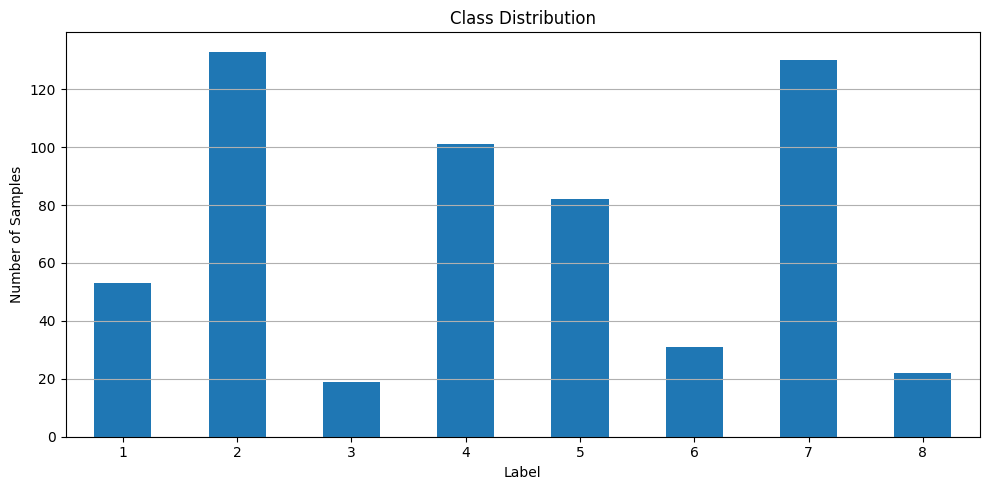

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
label_counts.sort_index().plot(kind='bar') # Sorted for consistent label ordering
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Wordclouds Per Labels 
- 8 labels so 8 wordclouds

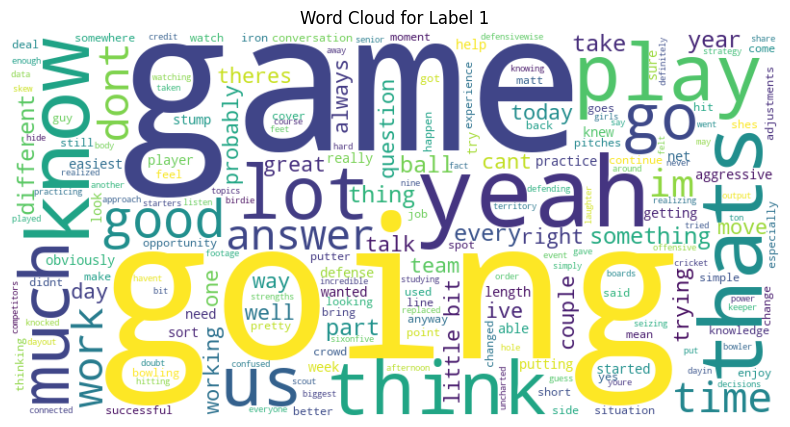

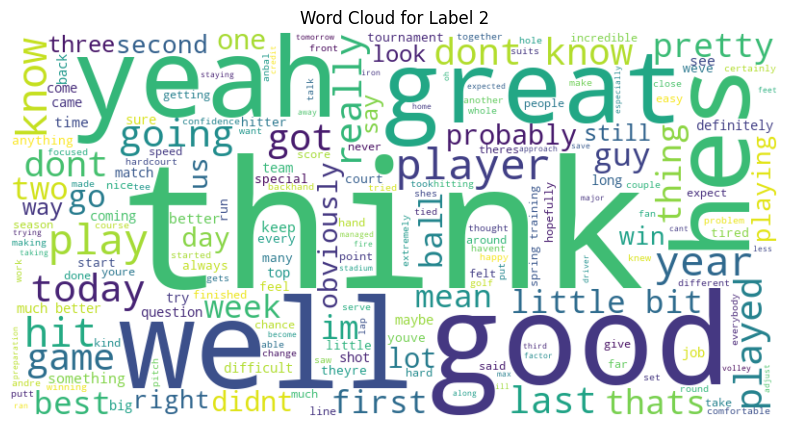

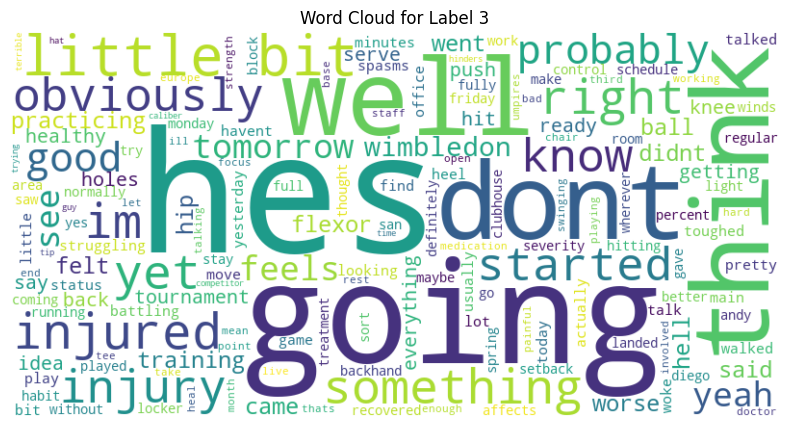

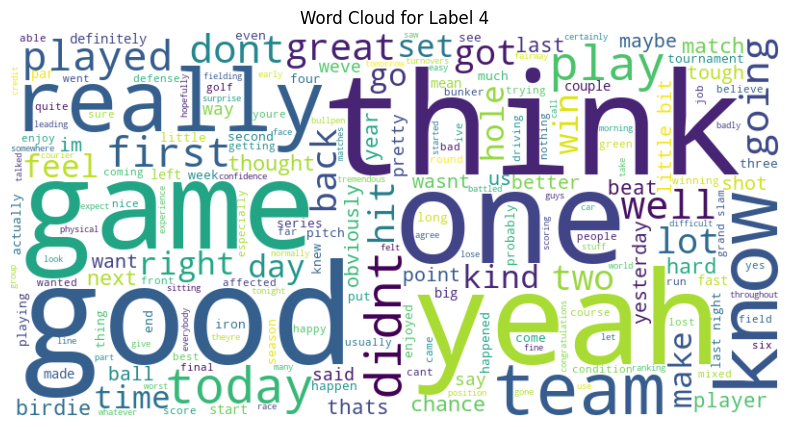

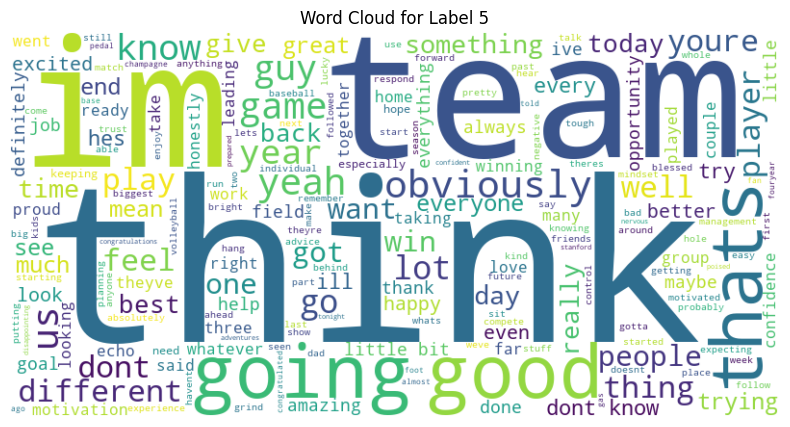

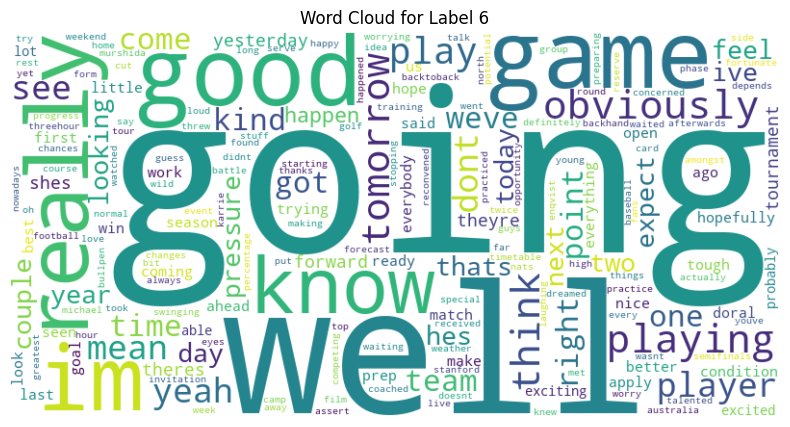

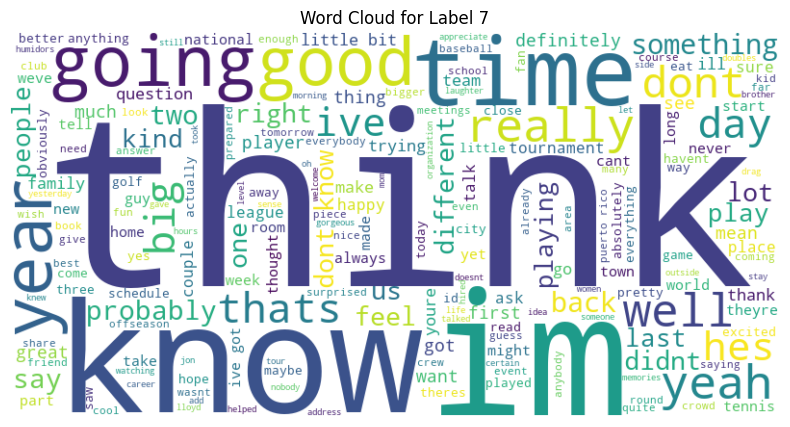

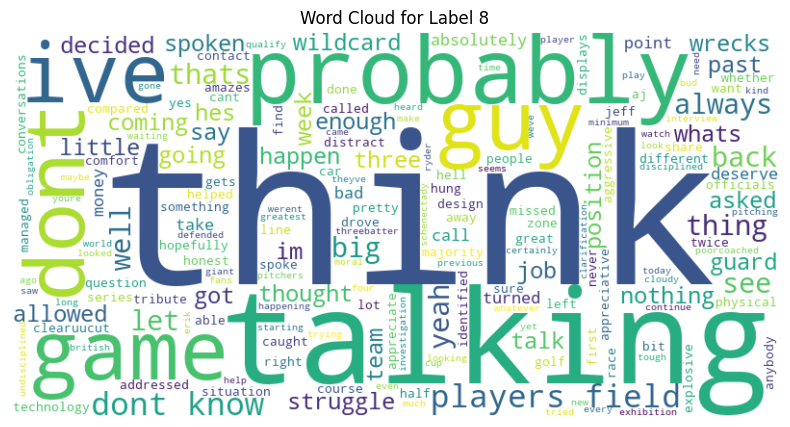

In [8]:
from wordcloud import WordCloud

for label in sorted(df['Labels'].unique()):
    #Combine all cleaned text entries for given label
    text = " ".join(df[df['Labels'] == label]['cleaned_text'])
    
    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label {label}')
    plt.show()
